# Kaggle challenge second delivery

## Sources

https://delladata.fr/tutoriel-regression-lineaire-multiple-r/ <br>
https://odr.inra.fr/intranet/carto/cartowiki/index.php/Regression_lin%C3%A9aire_avec_R

## Librairies

In [1]:
#Installer les librairies (Utile seulement la première fois !)
##install.packages("devtools")
#install.packages("RColorBrewer")
#devtools::install_github("hadley/tidyverse")
#install.packages("tidytext")
#install.packages("viridis")  # Installer

#Charger les librairies
library("viridis")           
library(RColorBrewer)
library(tidyverse)
library(lubridate)
library(stringr)
library(forcats)
library(tidytext)
library(sqldf)
library(plotly)
library(leaflet)
library(leaflet.extras)
library(ggplot2)
library(wordcloud2)
library(tm)
################################

library(dplyr)
library(tidyr)
library(leaflet)
library(leaflet.extras)
library(grid)
library(gridExtra)
library(scales)
library(knitr)
library(dplyr)
library(ggplot2)
library(readr)
library(stringr)
library(broom)
library(tidytext)
library(tidyr)
library(leaflet)
library(gridExtra)

Warning message:
"le package 'viridis' a été compilé avec la version R 4.1.3"
Le chargement a nécessité le package : viridisLite

Warning message:
"le package 'viridisLite' a été compilé avec la version R 4.1.3"
-- Attaching packages -------------------------------------------------------------------------- tidyverse 1.3.1.9000 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

Warning message:
"le package 'ggplot2' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'tibble' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'tidyr' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'readr' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'purrr' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'dplyr' a été compilé avec la version R 4.1.3"
Warning message:
"le package 'forcats' a été compilé avec la v

## Dataset

In [2]:
#Take the dataset
path=file.path("../dataset/Hotel_Reviews.csv")
data=read_csv(path)
head(data)
spec(data)
dataset = read.csv("../dataset/Hotel_Reviews.csv")
sapply(dataset, function(x)sum(is.na(x)))

Rows: 515738 Columns: 17
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (8): Hotel_Address, Review_Date, Hotel_Name, Reviewer_Nationality, Negat...
dbl (9): Additional_Number_of_Scoring, Average_Score, Review_Total_Negative_...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Hotel_Address                                           
1 s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands
2 s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands
3 s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands
4 s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands
5 s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands
6 s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands
  Additional_Number_of_Scoring Review_Date Average_Score Hotel_Name 
1 194                          8/3/2017    7.7           Hotel Arena
2 194                          8/3/2017    7.7           Hotel Arena
3 194                          7/31/2017   7.7           Hotel Arena
4 194                          7/31/2017   7.7           Hotel Arena
5 194                          7/24/2017   7.7           Hotel Arena
6 194                          7/24/2017   7.7           Hotel Arena
  Reviewer_Nationality
1 Russia              
2 Ireland             
3 Australia           
4 United Kingdom      
5 New Zealand         
6 Poland              
  Negative_Review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1 I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin your holiday So we had to wait till 13 00 in order to check in my new room what a 

cols(
  Hotel_Address = col_character(),
  Additional_Number_of_Scoring = col_double(),
  Review_Date = col_character(),
  Average_Score = col_double(),
  Hotel_Name = col_character(),
  Reviewer_Nationality = col_character(),
  Negative_Review = col_character(),
  Review_Total_Negative_Word_Counts = col_double(),
  Total_Number_of_Reviews = col_double(),
  Positive_Review = col_character(),
  Review_Total_Positive_Word_Counts = col_double(),
  Total_Number_of_Reviews_Reviewer_Has_Given = col_double(),
  Reviewer_Score = col_double(),
  Tags = col_character(),
  days_since_review = col_character(),
  lat = col_double(),
  lng = col_double()
)

Hotel_Address 
                                         0 
              Additional_Number_of_Scoring 
                                         0 
                               Review_Date 
                                         0 
                             Average_Score 
                                         0 
                                Hotel_Name 
                                         0 
                      Reviewer_Nationality 
                                         0 
                           Negative_Review 
                                         0 
         Review_Total_Negative_Word_Counts 
                                         0 
                   Total_Number_of_Reviews 
                                         0 
                           Positive_Review 
                                         0 
         Review_Total_Positive_Word_Counts 
                                         0 
Total_Number_of_Reviews_Reviewer_Has_Given 
                                         0 
                            Reviewer_Score 
                                         0 
                                      Tags 
                                         0 
                         days_since_review 
                                         0 
                                       lat 
                                      3268 
                                       lng 
                                      3268

In [3]:
#Clean the dataset
# can only run once without getting lat & lng errors!
dataset <- dataset %>%
  select(colnames(dataset),-lat, -lng, -Additional_Number_of_Scoring) %>%
  mutate(Positive_Review = ifelse(is.na(Positive_Review),
                                  "Nothing",
                                  Positive_Review)) %>%
  mutate(Negative_Review = ifelse(is.na(Negative_Review),
                                  "Nothing",
                                  Negative_Review))
sapply(dataset, function(x)sum(is.na(x)))
       
dataset_clean <- dataset
    #dataset_clean %>%
    dataset_clean$Country=sapply(str_split(dataset_clean$Hotel_Address," "),function(x){x[length(x)]})
    dataset_clean$city=sapply(str_split(dataset_clean$Hotel_Address," "),function(x){x[length(x)-1]})
    ## Remove the mention of "United" as "London" in the city column and "Kingdom" as "United Kingdom" in the country column
    dataset_clean$city=str_replace(dataset_clean$city,"United","London")
    dataset_clean$Country=str_replace(dataset_clean$Country,"Kingdom","United Kingdom")
       
dataset_clean <- dataset_clean %>%
  mutate(Review_Date = lubridate::mdy(Review_Date))
#summary(df)
# Time Series Analysis
# is the score dependent on time of year?
dataset_clean <- dataset_clean %>%
  mutate(Year = year(Review_Date)) %>%
  mutate(Month = month(Review_Date))
       
dataset_nlp <- dataset_clean %>%
  select(Hotel_Name, Country, Review_Date, Year, Month,
         Total_Number_of_Reviews_Reviewer_Has_Given, Negative_Review, Reviewer_Nationality,
         Positive_Review,Total_Number_of_Reviews_Reviewer_Has_Given, Tags, Reviewer_Score)
dataset_clean <- dataset_clean %>%
  select(Hotel_Name, Country, Review_Date, Year, Month, Average_Score,
         Reviewer_Nationality,Reviewer_Score,Total_Number_of_Reviews_Reviewer_Has_Given, Negative_Review,
         Positive_Review)

write.csv(dataset_clean,"datacleaned.csv", row.names = FALSE)
print("Our dataset cleaned:" )
head(dataset_clean)
print("First column of NLP:" )
head(dataset_nlp, n = 1)
       
dataset_clean <- dataset_clean %>%
  mutate(Reviewer_Nationality = trimws(dataset_clean$Reviewer_Nationality, which = "both"))

Hotel_Address 
                                         0 
                               Review_Date 
                                         0 
                             Average_Score 
                                         0 
                                Hotel_Name 
                                         0 
                      Reviewer_Nationality 
                                         0 
                           Negative_Review 
                                         0 
         Review_Total_Negative_Word_Counts 
                                         0 
                   Total_Number_of_Reviews 
                                         0 
                           Positive_Review 
                                         0 
         Review_Total_Positive_Word_Counts 
                                         0 
Total_Number_of_Reviews_Reviewer_Has_Given 
                                         0 
                            Reviewer_Score 
                                         0 
                                      Tags 
                                         0 
                         days_since_review 
                                         0

[1] "Our dataset cleaned:"


Hotel_Name  Country     Review_Date Year Month Average_Score
1 Hotel Arena Netherlands 2017-08-03  2017 8     7.7          
2 Hotel Arena Netherlands 2017-08-03  2017 8     7.7          
3 Hotel Arena Netherlands 2017-07-31  2017 7     7.7          
4 Hotel Arena Netherlands 2017-07-31  2017 7     7.7          
5 Hotel Arena Netherlands 2017-07-24  2017 7     7.7          
6 Hotel Arena Netherlands 2017-07-24  2017 7     7.7          
  Reviewer_Nationality Reviewer_Score
1  Russia              2.9           
2  Ireland             7.5           
3  Australia           7.1           
4  United Kingdom      3.8           
5  New Zealand         6.7           
6  Poland              6.7           
  Total_Number_of_Reviews_Reviewer_Has_Given
1 7                                         
2 7                                         
3 9                                         
4 1                                         
5 3                                         
6 1                                         
  Negative_Review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1  I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin your holiday So we had to wait till 13 00 in order to check in my new room what a wonderful waist of my time The r

[1] "First column of NLP:"


Hotel_Name  Country     Review_Date Year Month
1 Hotel Arena Netherlands 2017-08-03  2017 8    
  Total_Number_of_Reviews_Reviewer_Has_Given
1 7                                         
  Negative_Review                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
1  I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin your holiday So we had to wait till 13 00 in order to check in my new room what a wonderful waist of my time The room 023 i got was just as i wanted to peaceful internal garden view big window We were tired from waiting the room so we placed our belongings and rushed to the city In the evening it turned out that there was a constant noise in the room i guess it was made by vibrating vent tubes or something it was constant and annoying as hell AND it did not stop even at 2 am making it hard to fall asleep for me and my wife I have an audio recording that i can not attach here but if you want i can send it via e mail The next day the technician came but was not able to determine the cause of the disturbing sound so i was offered to change the room once again the hotel was fully booked and they had only 1 room left the one that was smaller but seems newer 
  Reviewer_Nationality Positive_Review                                   
1  Russi

## Linear Regression

In [7]:
# Variables explicatives : 
#x1 = Nationalité du reviewer, x2 = Pays de l'hotel, x3 = Nombre de mots positifs, x4 = Nombre de mots négatifs
pricereg2<-lm(Reviewer_Score ~ Reviewer_Nationality + Country, data=dataset_clean)

In [8]:
#### Regression output
summary(pricereg2)


Call:
lm(formula = Reviewer_Score ~ Reviewer_Nationality + Country, 
    data = dataset_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4897 -0.9138  0.4603  1.2181  3.3796 

Coefficients:
                                                          Estimate Std. Error
(Intercept)                                               8.257151   0.071229
Reviewer_NationalityAbkhazia Georgia                      0.324148   0.148691
Reviewer_NationalityAfghanistan                          -1.220146   0.576313
Reviewer_NationalityAlbania                               0.121181   0.119014
Reviewer_NationalityAlgeria                              -0.293109   0.176573
Reviewer_NationalityAmerican Samoa                       -2.515658   1.146102
Reviewer_NationalityAndorra                              -0.056365   0.214259
Reviewer_NationalityAngola                                0.065217   0.217289
Reviewer_NationalityAnguilla                             -0.757151   1.619290
Reviewer_Nation

In [9]:
#### Extraction des coefficients
coef(pricereg2)

(Intercept) 
                                             8.257151224 
                    Reviewer_NationalityAbkhazia Georgia 
                                             0.324148404 
                         Reviewer_NationalityAfghanistan 
                                            -1.220145590 
                             Reviewer_NationalityAlbania 
                                             0.121181206 
                             Reviewer_NationalityAlgeria 
                                            -0.293108952 
                      Reviewer_NationalityAmerican Samoa 
                                            -2.515657770 
                             Reviewer_NationalityAndorra 
                                            -0.056364793 
                              Reviewer_NationalityAngola 
                                             0.065216937 
                            Reviewer_NationalityAnguilla 
                                            -0.757151224 
                          Reviewer_NationalityAntarctica 
                                             0.632210727 
                     Reviewer_NationalityAntigua Barbuda 
                                             0.090935646 
                           Reviewer_NationalityArgentina 
                                             0.371954340 
                             Reviewer_NationalityArmenia 
                                            -0.005867938 
                               Reviewer_NationalityAruba 
                                             0.350547289 
                           Reviewer_NationalityAustralia 
                                             0.558901066 
                             Reviewer_NationalityAustria 
                                             0.197303056 
                          Reviewer_NationalityAzerbaijan 
                                            -0.172636989 
                             Reviewer_NationalityBahamas 
                                             0.568284682 
                             Reviewer_NationalityBahrain 
                                            -0.085948045 
                          Reviewer_NationalityBangladesh 
                                            -0.422578923 
                            Reviewer_NationalityBarbados 
                                             0.538806273 
                             Reviewer_NationalityBelarus 
                                             0.082760536 
                             Reviewer_NationalityBelgium 
                                             0.131697112 
                              Reviewer_NationalityBelize 
                                             0.303370344 
                               Reviewer_NationalityBenin 
                                             1.183422337 
                             Reviewer_NationalityBermuda 
                                             0.650194994 
                              Reviewer_NationalityBhutan 
                                             0.916661559 
                             Reviewer_NationalityBolivia 
                                             0.646025512 
       Reviewer_NationalityBonaire St Eustatius and Saba 
                                             0.987049224 
              Reviewer_NationalityBosnia and Herzegovina 
                                             0.193516071 
                            Reviewer_NationalityBotswana 
                                             0.219431476 
                              Reviewer_NationalityBrazil 
                                             0.376051758 
              Reviewer_NationalityBritish Virgin Islands 
                                             0.432763201 
                              Reviewer_NationalityBrunei 
                                             0.465049940 
                            Reviewer_NationalityBulgaria 
                                           

In [10]:
#### Intervalle de confiance (à 95%) des coefficients
confint(pricereg2)

2.5 %       
(Intercept)                                               8.117545494
Reviewer_NationalityAbkhazia Georgia                      0.032718908
Reviewer_NationalityAfghanistan                          -2.349700868
Reviewer_NationalityAlbania                              -0.112083244
Reviewer_NationalityAlgeria                              -0.639187054
Reviewer_NationalityAmerican Samoa                       -4.761981518
Reviewer_NationalityAndorra                              -0.476305680
Reviewer_NationalityAngola                               -0.360663590
Reviewer_NationalityAnguilla                             -3.930907844
Reviewer_NationalityAntarctica                           -1.203658118
Reviewer_NationalityAntigua Barbuda                      -0.767737732
Reviewer_NationalityArgentina                             0.175306508
Reviewer_NationalityArmenia                              -0.312905522
Reviewer_NationalityAruba                                -0.235586407
Reviewer_NationalityAustralia                             0.418587322
Reviewer_NationalityAustria                               0.044254649
Reviewer_NationalityAzerbaijan                           -0.408277321
Reviewer_NationalityBahamas                              -0.009114003
Reviewer_NationalityBahrain                              -0.245753264
Reviewer_NationalityBangladesh                           -0.715499656
Reviewer_NationalityBarbados                              0.109811976
Reviewer_NationalityBelarus                              -0.184828735
Reviewer_NationalityBelgium                              -0.012843082
Reviewer_NationalityBelize                               -0.826184321
Reviewer_NationalityBenin                                -0.118414228
Reviewer_NationalityBermuda                               0.308387465
Reviewer_NationalityBhutan                               -0.385171006
Reviewer_NationalityBolivia                              -0.114069436
Reviewer_NationalityBonaire St Eustatius and Saba        -0.848830238
Reviewer_NationalityBosnia and Herzegovina               -0.051783143
...                                                      ...         
Reviewer_NationalityThailand                              0.002494708
Reviewer_NationalityTogo                                 -0.813068434
Reviewer_NationalityTrinidad and Tobago                   0.414818724
Reviewer_NationalityTunisia                              -0.568153359
Reviewer_NationalityTurkey                               -0.215629987
Reviewer_NationalityTurkmenistan                         -2.101049252
Reviewer_NationalityTurks Caicos Islands                 -0.922387431
Reviewer_NationalityTuvalu                               -4.147919370
Reviewer_NationalityU S Virgin Islands                   -0.650801270
Reviewer_NationalityUganda                               -0.341721178
Reviewer_NationalityUkraine                               0.096707553
Reviewer_NationalityUnited Arab Emirates                 -0.304662358
Reviewer_NationalityUnited Kingdom                        0.385906437
Reviewer_NationalityUnited States Minor Outlying Islands -0.196933131
Reviewer_NationalityUnited States of America              0.592898542
Reviewer_NationalityUruguay                               0.127783813
Reviewer_NationalityUzbekistan                           -0.910210382
Reviewer_NationalityVanuatu                              -0.111514646
Reviewer_NationalityVatican City                         -3.530907844
Reviewer_NationalityVenezuela                             0.155498848
Reviewer_NationalityVietnam                              -0.242990265
Reviewer_NationalityWallis and Futuna                    -2.930643856
Reviewer_NationalityYemen                                -0.758739712
Reviewer_NationalityZambia                               -0.323708766
Reviewer_NationalityZimbabwe                             -0.532093321
CountryFrance                                            -0.1992532

In [11]:
#### Extraction des valeurs prédites
fitted(pricereg2)

1         2         3         4         5         6         7         8 
 8.264668  8.530290  8.638519  8.604331  8.714517  8.223325  8.604331  8.604331 
        9        10        11        12        13        14        15        16 
 8.211315  8.195568  8.604331  8.178318  8.604331  8.142271  8.575920  8.142271 
       17        18        19        20        21        22        23        24 
 8.604331  8.530290  8.153457  8.638519  8.604331  8.178318  8.150660  8.530290 
       25        26        27        28        29        30        31        32 
 8.604331  8.812194  8.604331  8.178318  8.812194  8.444660  8.530290  8.604331 
       33        34        35        36        37        38        39        40 
 8.812194  8.153457  8.812194  8.699860  8.530290  8.264668  8.604331  8.575920 
       41        42        43        44        45        46        47        48 
 8.150660  8.604331  8.197493  8.604331  8.812194  7.907206  8.604331  8.604331 
       49        50        51        52        53        54        55        56 
 8.604331  7.917106  8.604331  8.604331  8.153457  8.604331  8.223325  8.604331 
       57        58        59        60        61        62        63        64 
 8.604331  8.604331  8.604331  8.197493  8.231306  8.117697  8.604331  8.412097 
       65        66        67        68        69        70        71        72 
 8.604331  8.604331  8.604331  8.412097  7.917106  8.604331  8.150660  8.197493 
       73        74        75        76        77        78        79        80 
 8.117697  8.604331  8.604331  8.604331  8.604331  8.530290  8.604331  8.604331 
       81        82        83        84        85        86        87        88 
 8.251156  8.604331  8.211315  8.604331  8.197493  8.604331  8.604331  8.604331 
       89        90        91        92        93        94        95        96 
 8.604331  8.604331  8.178318  8.197493  8.604331  8.312489  8.083299  8.604331 
       97        98        99       100       101       102       103       104 
 8.604331  8.604331  8.604331  8.530290  8.604331  8.604331  8.153457  8.638519 
      105       106       107       108       109       110       111       112 
 8.604331  8.812194  8.575920  8.812194  8.604331  8.604331  8.412097  8.812194 
      113       114       115       116       117       118       119       120 
 8.604331  8.604331  8.604331  8.153457  8.604331  8.575920  8.604331  8.575920 
      121       122       123       124       125       126       127       128 
 8.604331  8.812194  8.238794  8.604331  8.530290  8.604331  8.604331  8.604331 
      129       130       131       132       133       134       135       136 
 8.812194  8.604331  8.604331  8.153457  8.195568  8.604331  8.638519  8.211315 
      137       138       139       140       141       142       143       144 
 8.604331  8.604331  8.604331  8.604331  8.604331  8.604331  8.604331  8.197493 
      145       146       147       148       149       150       151       152 
 8.174186  8.604331  8.604331  8.604331  8.530290  8.604331  8.604331  8.604331 
      153       154       155       156       157       158       159       160 
 8.530290  8.604331  8.530290  8.812194  8.604331  8.604331  8.150660  8.312489 
      161       162       163       164       165       166       167       168 
 8.604331  8.604331  8.604331  8.604331  8.604331  8.638519  8.604331  8.604331 
      169       170       171       172       173       174       175       176 
 8.604331  8.604331  8.812194  8.153457  8.604331  8.604331  8.604331  8.604331 
      177       178       179       180       181       182       183       184 
 8.604331  8.604331  8.530290  8.604331  8.604331  8.604331  8.604331  8.502660 
      185       186       187       188       189       190       191       192 
 8.699860  8.604331  8.604331  8.530290  8.604331  8.476062  8.699860  8.264668 
      193       194       195       196       197       198       199       200 
 8.604331  8.604331  8.604331  8.604331

In [12]:
#### Extraction des résidus
resid(pricereg2)

1             2             3             4             5 
-5.364668e+00 -1.030290e+00 -1.538519e+00 -4.804331e+00 -2.014517e+00 
            6             7             8             9            10 
-1.523325e+00 -4.004331e+00  1.395669e+00 -1.711315e+00 -2.955675e-01 
           11            12            13            14            15 
 1.395669e+00 -2.378318e+00 -4.004331e+00  1.057729e+00  2.240796e-01 
           16            17            18            19            20 
 1.857729e+00 -2.304331e+00 -1.030290e+00 -1.053457e+00 -1.138519e+00 
           21            22            23            24            25 
-2.304331e+00 -4.378318e+00 -2.750660e+00  1.069710e+00  9.956688e-01 
           26            27            28            29            30 
-5.121935e-01  9.956688e-01  1.216825e-01 -5.121935e-01  7.553403e-01 
           31            32            33            34            35 
 6.697098e-01 -1.504331e+00 -4.612194e+00 -1.453457e+00 -9.121935e-01 
           36            37            38            39            40 
-3.998602e-01 -1.430290e+00  5.353321e-01  1.956688e-01 -2.275920e+00 
           41            42            43            44            45 
-6.506603e-01 -1.904331e+00 -5.297493e+00  9.956688e-01 -5.512194e+00 
           46            47            48            49            50 
-7.206107e-03 -4.404331e+00 -3.043312e-01  1.395669e+00 -2.517106e+00 
           51            52            53            54            55 
 9.956688e-01 -1.504331e+00  1.846543e+00  1.395669e+00 -3.233251e-01 
           56            57            58            59            60 
 1.395669e+00 -1.504331e+00 -7.043312e-01 -7.043312e-01  1.402507e+00 
           61            62            63            64            65 
-3.631306e+00 -1.017697e+00 -3.043312e-01 -2.112097e+00  5.956688e-01 
           66            67            68            69            70 
 1.956688e-01  5.956688e-01 -9.120971e-01 -1.710555e-02  1.956688e-01 
           71            72            73            74            75 
-1.450660e+00 -1.097493e+00 -1.017697e+00 -2.304331e+00 -1.504331e+00 
           76            77            78            79            80 
 1.395669e+00 -1.504331e+00 -1.030290e+00  5.956688e-01  5.956688e-01 
           81            82            83            84            85 
-2.851156e+00  1.395669e+00 -2.411315e+00  5.956688e-01 -2.974933e-01 
           86            87            88            89            90 
 1.395669e+00 -1.104331e+00 -2.804331e+00 -2.804331e+00 -1.104331e+00 
           91            92            93            94            95 
-3.978318e+00 -1.097493e+00 -3.604331e+00 -4.112489e+00 -1.383299e+00 
           96            97            98            99           100 
 9.956688e-01  1.395669e+00  1.956688e-01 -3.604331e+00 -2.230290e+00 
          101           102           103           104           105 
-3.604331e+00 -4.004331e+00  6.465432e-01  5.614815e-01 -7.043312e-01 
          106           107           108           109           110 
 1.187806e+00 -1.475920e+00 -5.012194e+00  9.956688e-01  1.956688e-01 
          111           112           113           114           115 
-5.120971e-01 -2.512194e+00  1.395669e+00  9.956688e-01  1.956688e-01 
          116           117           118           119           120 
-1.053457e+00  5.956688e-01  2.240796e-01 -7.043312e-01 -1.075920e+00 
          121           122           123           124           125 
-4.004331e+00 -5.121935e-01 -4.038794e+00 -1.104331e+00 -3.930290e+00 
          126           127           128           129           130 
-1.104331e+00 -2.804331e+00  5.956688e-01 -1.219355e-02 -7.043312e-01 
          131           132           133           134           135 
-7.043312e-01  1.465432e-01 -1.095568e+00  1.395669e+00 -4.038519e+00 
          136           137           138           139           140 
 1.388685e+00  1.395669e+00  5.956688e-01 -2.304331e+00 -1.904331e+00 
          141           142         

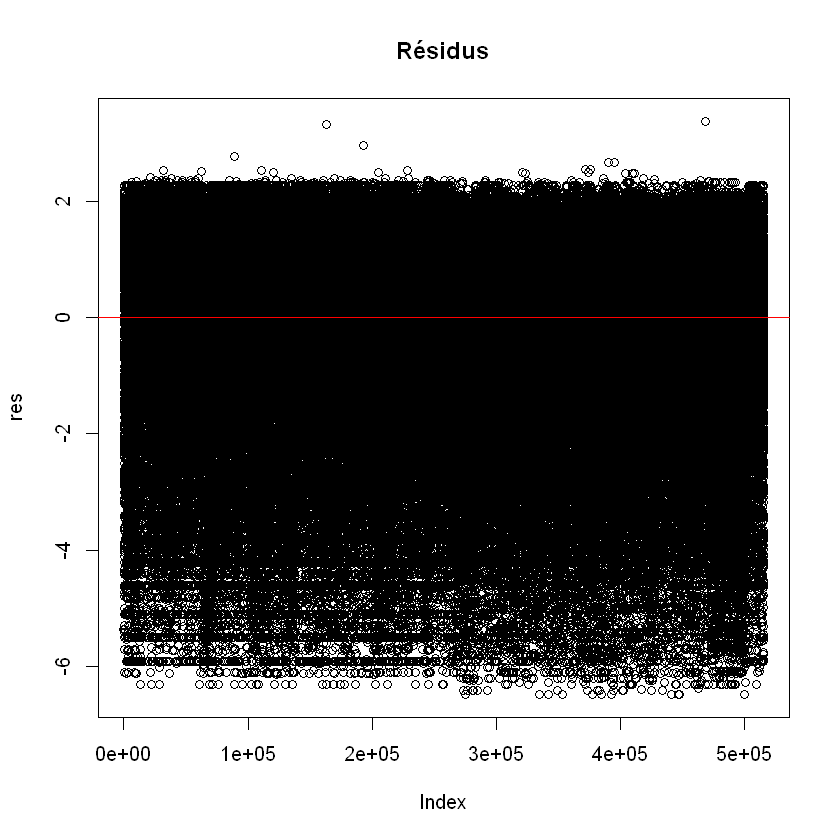

In [13]:
#### résidus
res<-resid(pricereg2)
plot(res,main="Résidus")
abline(h=0,col="red")